In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
churn = pd.read_csv("train.csv")
churn

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,NaN,NaN,51,San Mateo,4849,Two Year,United States,...,25,2191.15,0,486.00,0.00,2677.15,0,1,94403,0
1,27,59,45.62,NaN,NaN,27,Sutter Creek,3715,Month-to-Month,United States,...,35,3418.20,0,1596.70,0.00,5014.90,1,1,95685,0
2,59,0,16.07,NaN,NaN,59,Santa Cruz,5092,Month-to-Month,United States,...,46,851.20,0,739.22,0.00,1590.42,0,0,95064,0
3,25,27,0.00,NaN,NaN,49,Brea,2068,One Year,United States,...,27,1246.40,30,0.00,0.00,1276.40,1,0,92823,0
4,31,21,17.22,Dissatisfaction,Network reliability,88,San Jose,4026,One Year,United States,...,58,3563.80,0,998.76,0.00,4562.56,0,1,95117,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,36,0,7.76,NaN,NaN,52,Long Beach,4590,Month-to-Month,United States,...,1,19.90,0,7.76,0.00,27.66,0,0,90806,0
4221,77,22,23.43,NaN,NaN,34,San Francisco,5602,One Year,United States,...,22,1820.90,0,515.46,29.88,2306.48,0,1,94127,0
4222,56,0,28.06,NaN,NaN,63,Olivehurst,4458,One Year,United States,...,18,345.90,0,505.08,0.00,850.98,0,0,95961,0
4223,45,22,0.00,NaN,NaN,38,Westlake Village,4115,Month-to-Month,United States,...,57,3437.45,0,0.00,0.00,3437.45,0,1,91361,0


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     1121 non-null   object 
 4   Churn Reason                       1121 non-null   object 
 5   Churn Score                        4225 non-null   int64  
 6   City                               4225 non-null   object 
 7   CLTV                               4225 non-null   int64  
 8   Contract                           4225 non-null   object 
 9   Country                            4225 non-null   object 
 10  Customer ID                        4225 non-null   object 
 11  Customer Status                    4225 non-null   objec

In [4]:
churn.describe()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Score,CLTV,Dependents,Device Protection Plan,Internet Service,Latitude,Longitude,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,...,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,46.451124,20.740828,22.766963,58.281183,4409.751243,0.233136,0.346982,0.790296,36.207274,-119.768187,...,32.681893,2306.078107,6.965680,754.719141,1.953846,3065.809082,0.200000,0.677870,93491.892781,0.265325
std,16.731518,20.366105,15.429992,21.197931,1170.599119,0.422878,0.476066,0.407146,2.471090,2.154078,...,24.621041,2271.448881,25.250169,854.909725,7.814374,2884.817379,0.400047,0.467348,1863.337187,0.441559
min,19.000000,0.000000,0.000000,5.000000,2003.000000,0.000000,0.000000,0.000000,32.555828,-124.301372,...,1.000000,18.800000,0.000000,0.000000,0.000000,21.360000,0.000000,0.000000,90001.000000,0.000000
25%,32.000000,4.000000,9.050000,40.000000,3493.000000,0.000000,0.000000,1.000000,33.994524,-121.788090,...,9.000000,401.500000,0.000000,67.680000,0.000000,592.750000,0.000000,0.000000,92102.000000,0.000000
50%,46.000000,17.000000,22.570000,61.000000,4531.000000,0.000000,0.000000,1.000000,36.205465,-119.622676,...,30.000000,1424.600000,0.000000,396.640000,0.000000,2151.470000,0.000000,1.000000,93513.000000,0.000000
75%,60.000000,27.000000,36.170000,75.000000,5381.000000,0.000000,1.000000,1.000000,38.196497,-117.991372,...,56.000000,3846.750000,0.000000,1200.000000,0.000000,4845.750000,0.000000,1.000000,95337.000000,1.000000
max,80.000000,85.000000,49.990000,96.000000,6500.000000,1.000000,1.000000,1.000000,41.962127,-114.192901,...,72.000000,8672.450000,150.000000,3564.000000,49.790000,11979.340000,1.000000,1.000000,96150.000000,1.000000


In [5]:
object_cols = churn.select_dtypes(include=['object']).columns
numeric_cols = churn.select_dtypes(include=['number']).columns
churn_num = churn[numeric_cols]


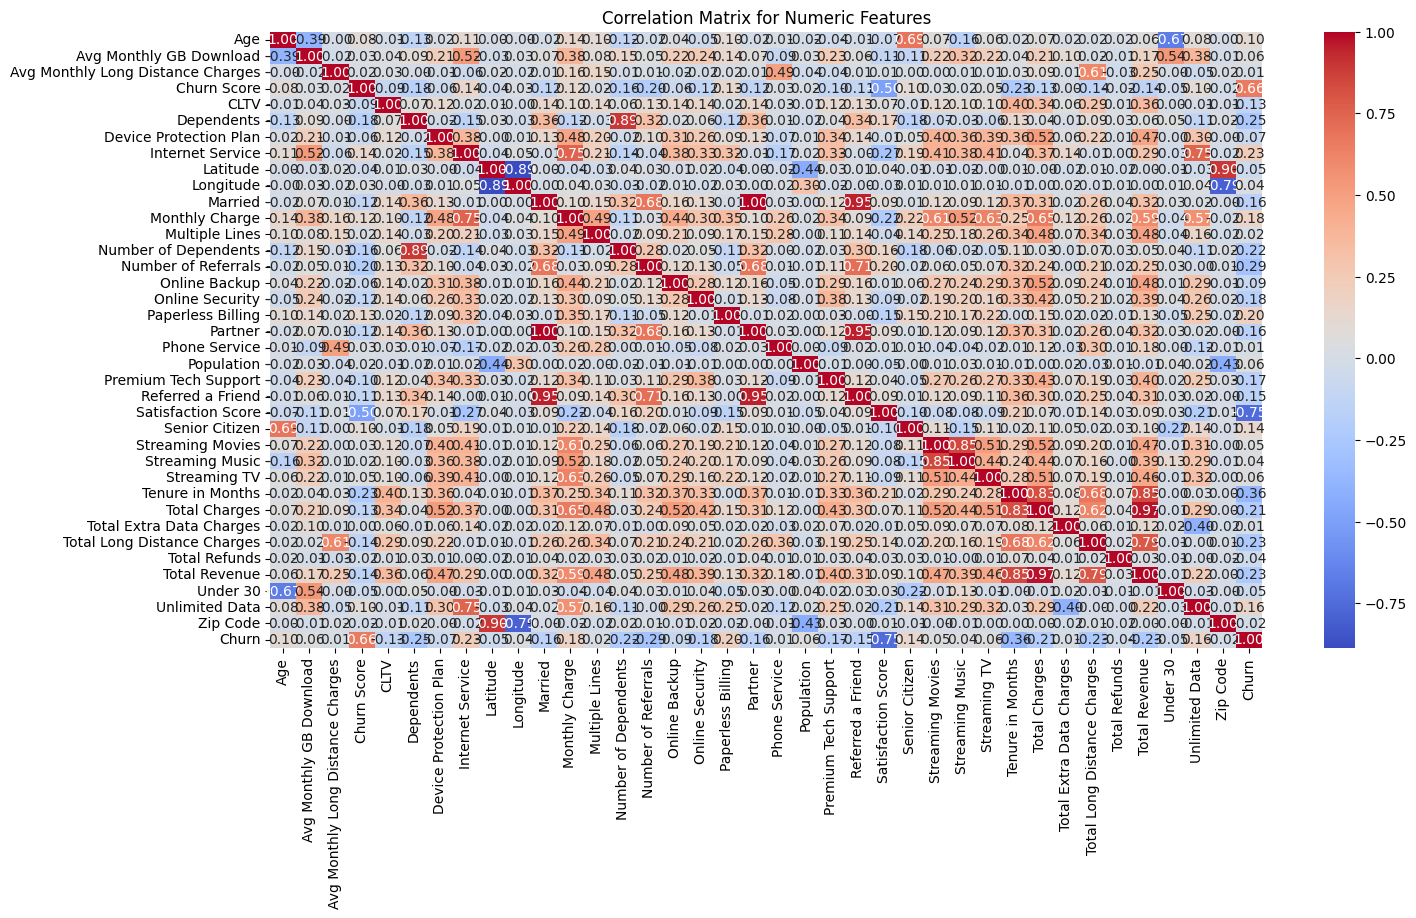

In [6]:
plt.figure(figsize=(16,8))
sns.heatmap(churn_num.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix for Numeric Features")
plt.show()

In [7]:
selector = SelectKBest(score_func=f_classif, k=5)
X = churn_num.drop(columns=['Churn'])
y = churn_num['Churn']
X_new = selector.fit_transform(X, y)
X_new_DF = pd.DataFrame(X_new, columns=X.columns[selector.get_support()])
X_new_DF

,Churn Score,Dependents,Number of Referrals,Satisfaction Score,Tenure in Months
0,51.0,0.0,1.0,3.0,25.0
1,27.0,0.0,0.0,3.0,35.0
2,59.0,0.0,3.0,5.0,46.0
3,49.0,0.0,3.0,4.0,27.0
4,88.0,0.0,1.0,2.0,58.0
...,...,...,...,...,...
4220,52.0,0.0,0.0,3.0,1.0
4221,34.0,0.0,0.0,4.0,22.0
4222,63.0,1.0,1.0,5.0,18.0
4223,38.0,0.0,1.0,3.0,57.0


,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Score,CLTV,Dependents,Device Protection Plan,Internet Service,Latitude,Longitude,...,"Lat Long_41.949216, -122.050062","Lat Long_41.950683, -124.097094","Lat Long_41.962127, -122.527696",Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Offer_nan,Payment Method_Credit Card,Payment Method_Mailed Check
0,72,4,19.44,51,4849,0,1,1,37.538309,-122.305109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,27,59,45.62,27,3715,0,1,1,38.432145,-120.770690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,59,0,16.07,59,5092,0,0,0,37.007882,-122.065975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,25,27,0.00,49,2068,0,1,1,33.924143,-117.793870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,31,21,17.22,88,4026,0,1,1,37.311088,-121.961786,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,36,0,7.76,52,4590,0,0,0,33.802664,-118.179971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4221,77,22,23.43,34,5602,0,0,1,37.736535,-122.457320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4222,56,0,28.06,63,4458,1,0,0,39.082568,-121.553250,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4223,45,22,0.00,38,4115,0,1,1,34.130992,-118.894673,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
